In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 15)
import seaborn as sns
import h5py
from scipy.stats import linregress

## Effective Pressure

In [10]:
effective_pressure_file = h5py.File('effective_pressure_smoothed_subset_RD0000.hdf5')
p_eff_x = np.array(effective_pressure_file['p_eff_x'][:])
p_eff_y = np.array(effective_pressure_file['p_eff_y'][:])
p_eff_z = np.array(effective_pressure_file['p_eff_z'][:])
density = np.array(effective_pressure_file['density'][:])
norm = np.sqrt(np.square(p_eff_x) + np.square(p_eff_y) + np.square(p_eff_z))

In [11]:
effective_pressure = pd.DataFrame(
    {'p_eff_x': p_eff_x,
     'p_eff_y': p_eff_y,
     'p_eff_z': p_eff_z,
     'norm': norm,
     'density': density,
     'lognorm': np.log10(norm),
     'logdensity': np.log10(density)
    }
)
effective_pressure.describe()

,density,logdensity,lognorm,norm,p_eff_x,p_eff_y,p_eff_z
count,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.460482e-30,-30.178763,-inf,1.015941e-16,4.411591e-17,1.961249e-17,5.635421e-17
std,2.204661e-29,0.572258,NaN,1.237136e-15,9.229860e-16,2.001800e-16,8.020916e-16
min,5.059052e-32,-31.295931,-inf,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.703283e-31,-30.568108,-inf,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.959832e-31,-30.304533,-20.080109,8.317166e-21,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.262594e-30,-29.898736,-17.934904,1.161711e-18,2.093473e-20,2.985632e-20,1.417241e-20
max,4.731044e-28,-27.325043,-13.542362,2.868392e-14,2.868392e-14,3.231316e-15,1.844112e-14


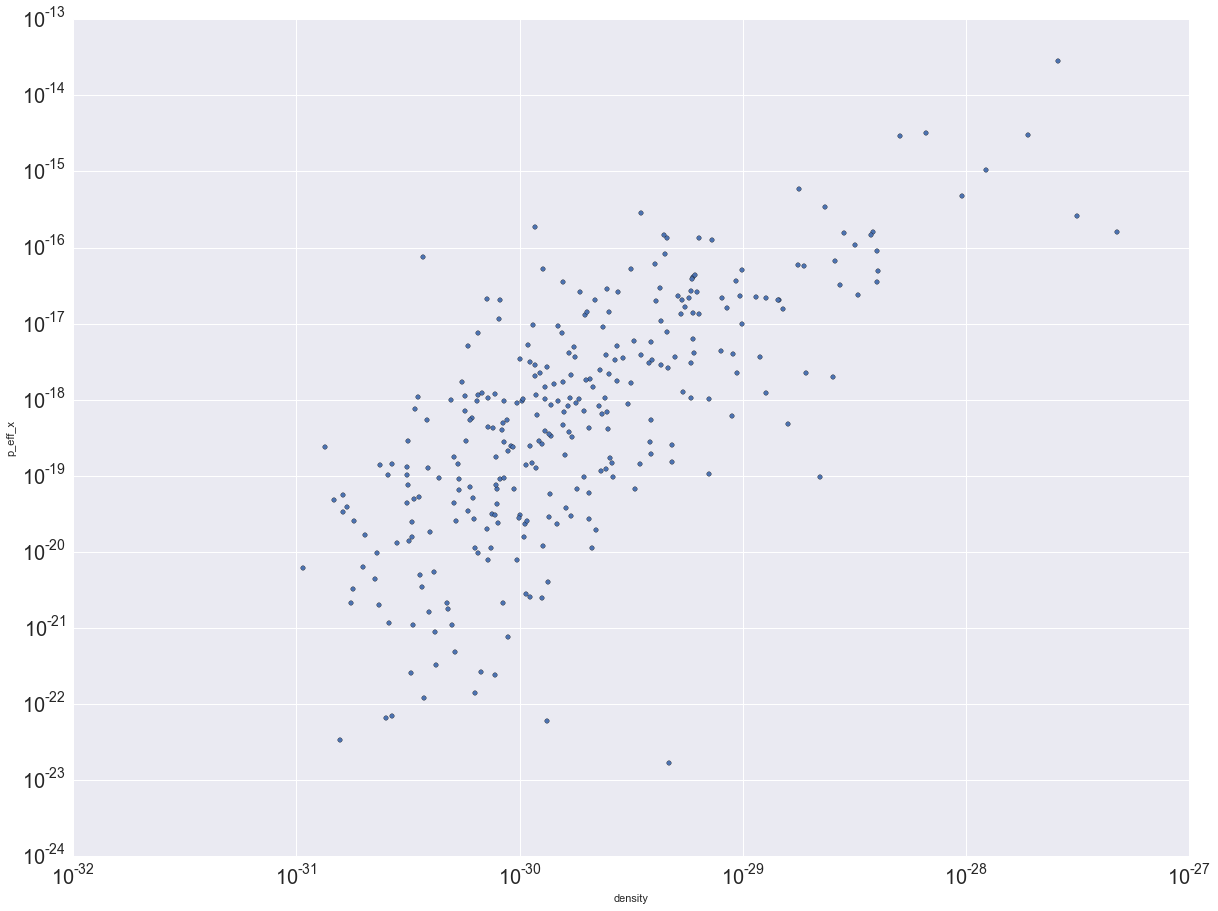

In [12]:
effective_pressure.plot.scatter(x='density', y='p_eff_x', loglog=True, ylim=[10e-25,10e-14], fontsize=20)

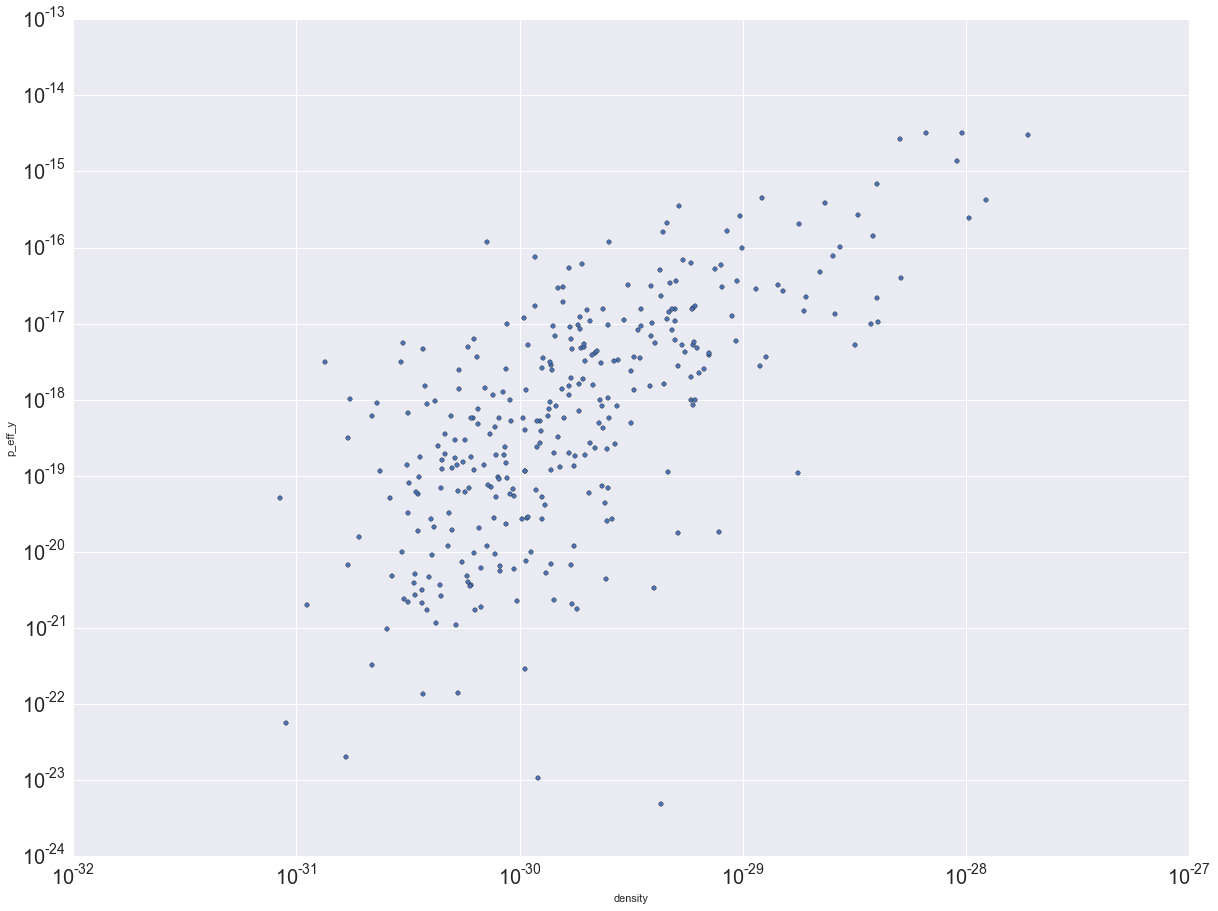

In [13]:
effective_pressure.plot.scatter(x='density', y='p_eff_y', loglog=True, ylim=[10e-25,10e-14], fontsize=20)

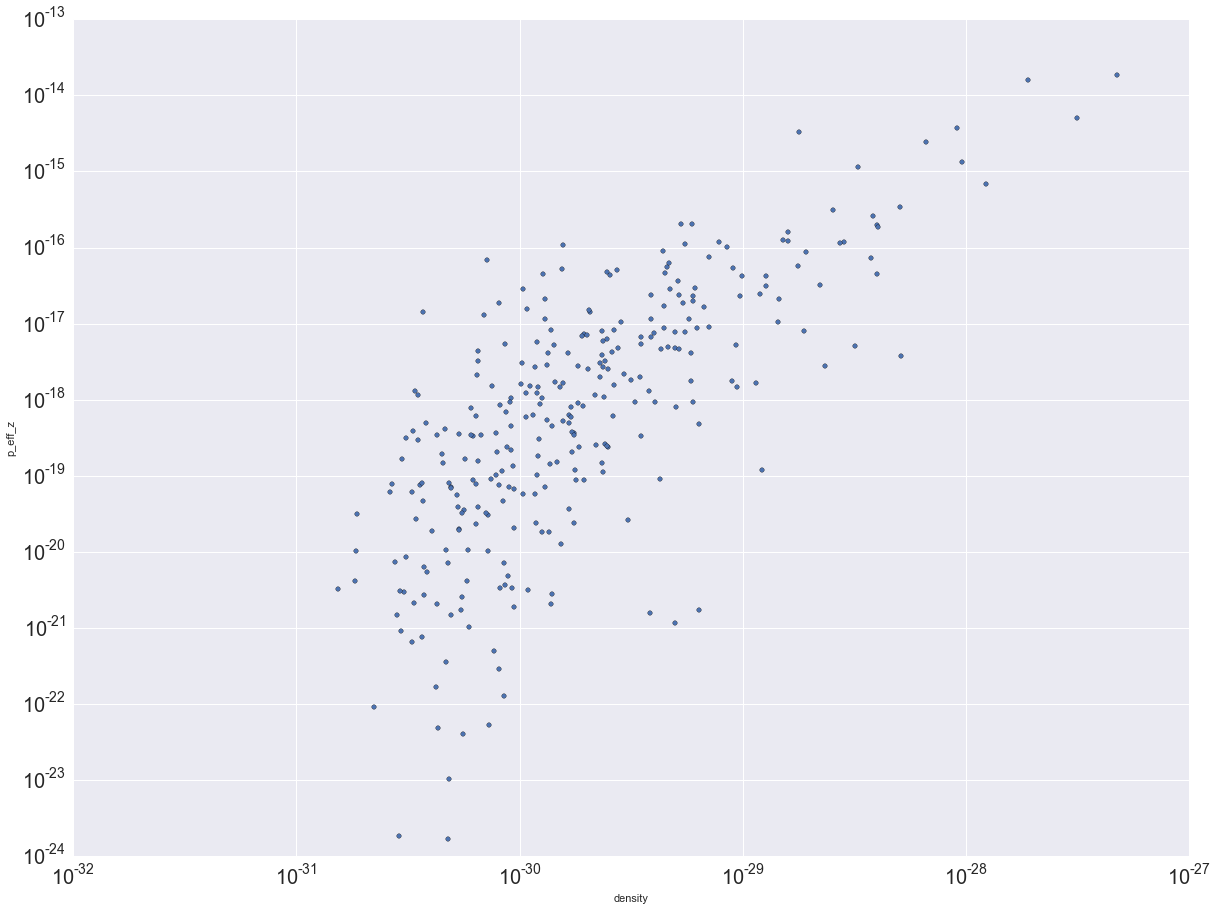

In [14]:
effective_pressure.plot.scatter(x='density', y='p_eff_z', loglog=True, ylim=[10e-25,10e-14], fontsize=20)

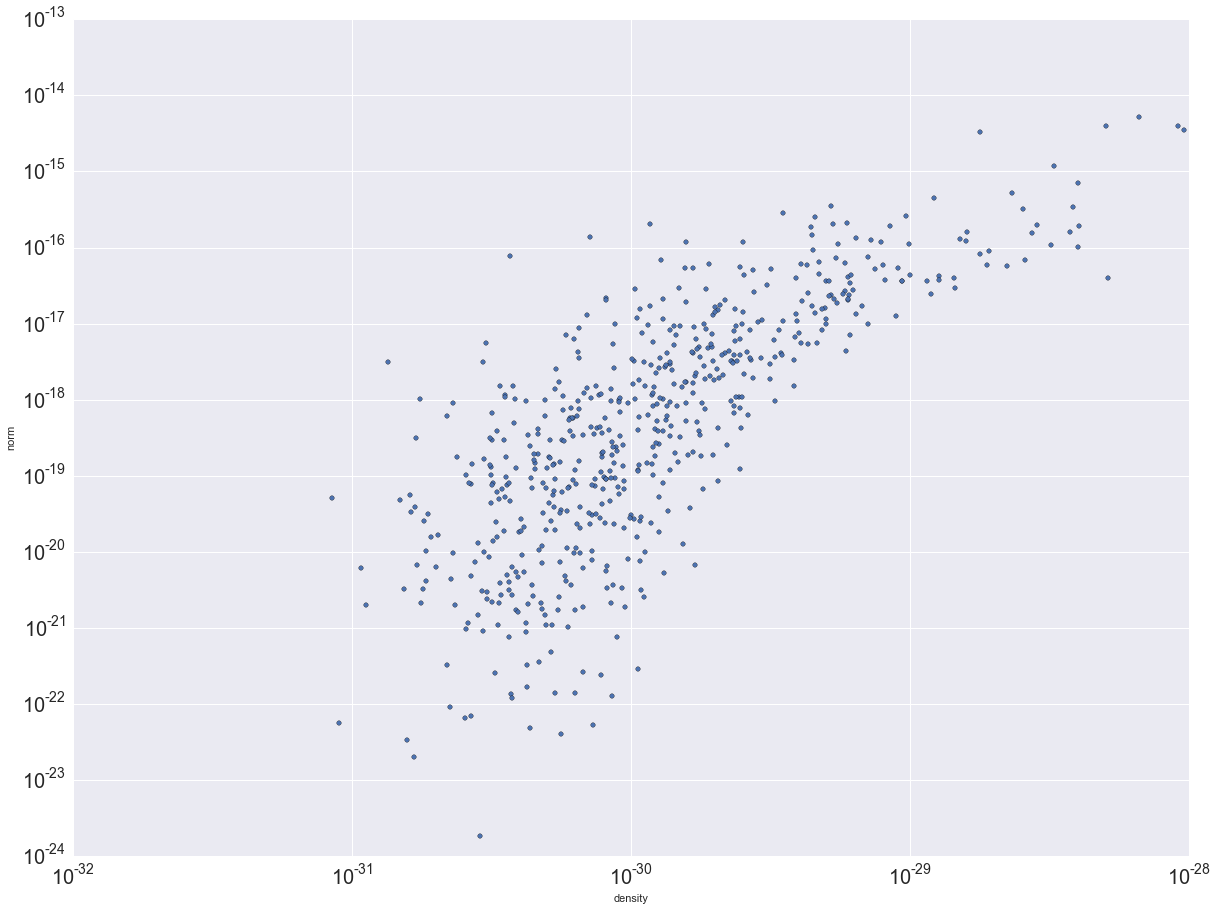

In [20]:
effective_pressure.plot.scatter(x='density', y='norm', loglog=True, xlim=[10e-33, 10e-29],ylim=[10e-25,10e-14], fontsize=20)

In [26]:
linregress(effective_pressure['density'], effective_pressure['norm'])

LinregressResult(slope=45499548123761.234, intercept=-5.5856296613224063e-17, rvalue=0.81083267976751272, pvalue=2.0921937802803055e-234, stderr=1039615596580.7234)

In [33]:
np.log(np.mean(effective_pressure['norm']) / np.mean(effective_pressure['density']))

31.010598475065262